In [1]:
import utils
import pandas as pd
import classifiers
import evaluations

In [2]:
df5s, df10s, df30s = utils.task4_df()

In [3]:
whole_df = pd.concat((df5s, df10s, df30s), ignore_index=True)

In [4]:
X_train, y_train, X_val, y_val = utils.train_val_split(whole_df)

In [5]:
y_val_pred = classifiers.tensorflow_fcnn(X_train, y_train, X_val, y_val)

Epoch 1/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4807 - loss: 1.5034 - val_accuracy: 0.6823 - val_loss: 0.9592
Epoch 2/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8253 - loss: 0.5182 - val_accuracy: 0.7071 - val_loss: 0.9776
Epoch 3/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9003 - loss: 0.3069 - val_accuracy: 0.6995 - val_loss: 1.1206
Epoch 4/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9319 - loss: 0.2037 - val_accuracy: 0.7076 - val_loss: 1.1941
Epoch 5/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9624 - loss: 0.1190 - val_accuracy: 0.6934 - val_loss: 1.2909
Epoch 6/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9643 - loss: 0.1120 - val_accuracy: 0.7086 - val_loss: 1.3165
Epoch 7/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9828 - loss: 0.0600 - val_accuracy: 0.7020 - val_loss: 1.4487
Epoch 8/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9880 - loss: 0.0455 - val_accu

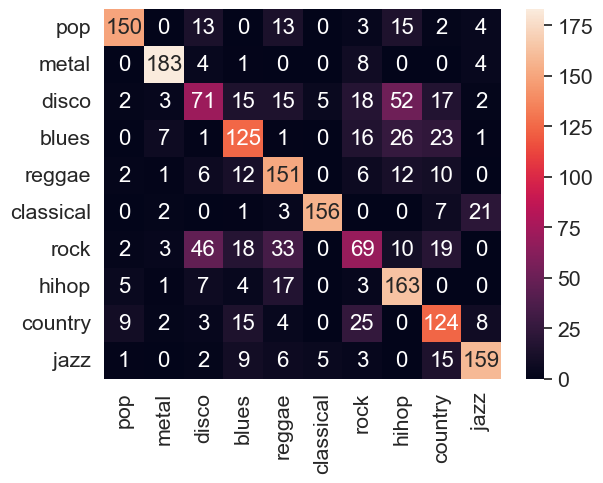

In [6]:
evaluations.conf_matrix(y_val_pred, y_val)

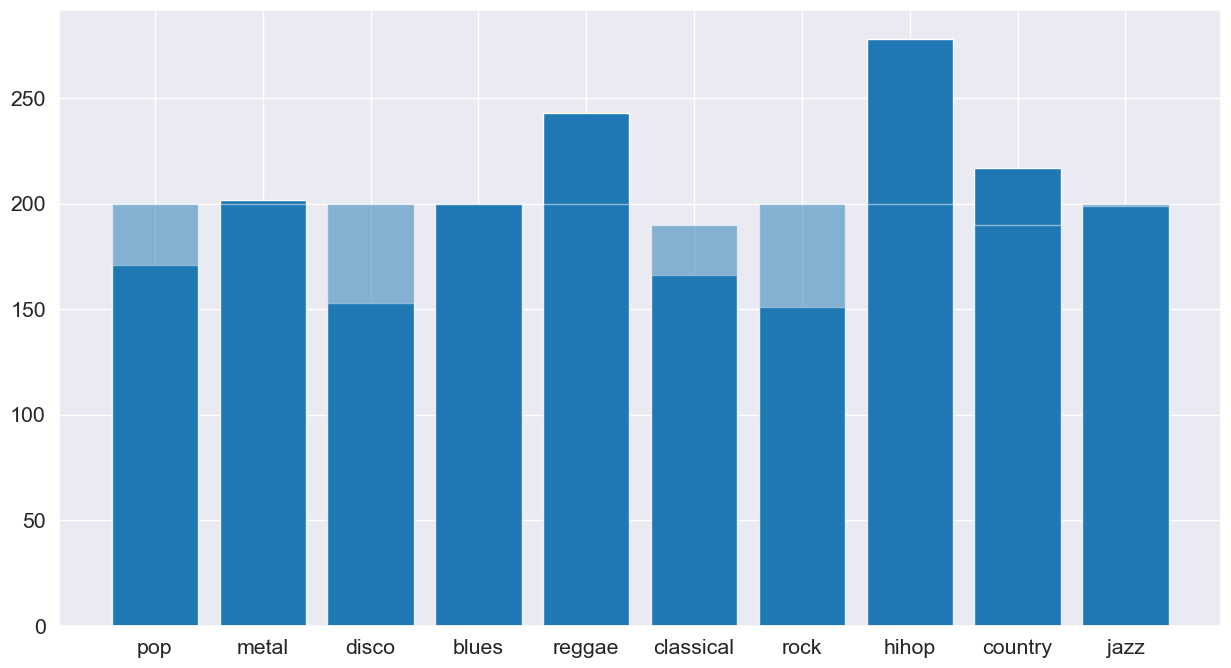

In [7]:
evaluations.distribution(y_val_pred, y_val)

Accuracy : 0.693939393939394


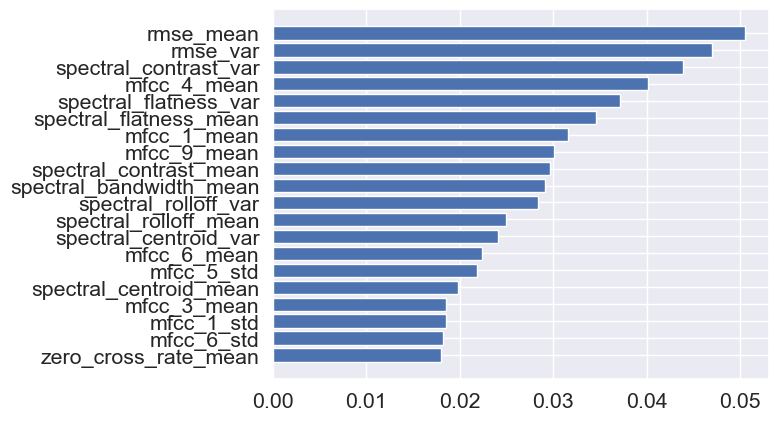

In [8]:
y_val_pred = classifiers.sklearn_rf(X_train, y_train, X_val, y_val)

The 4 most important features for the random forest are [rmse_mean, rmse_var, spectral_contrast_var, mfcc_4_mean]

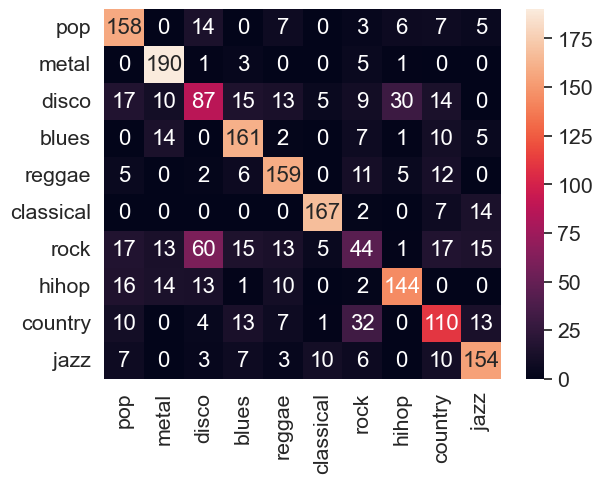

In [9]:
evaluations.conf_matrix(y_val_pred, y_val)

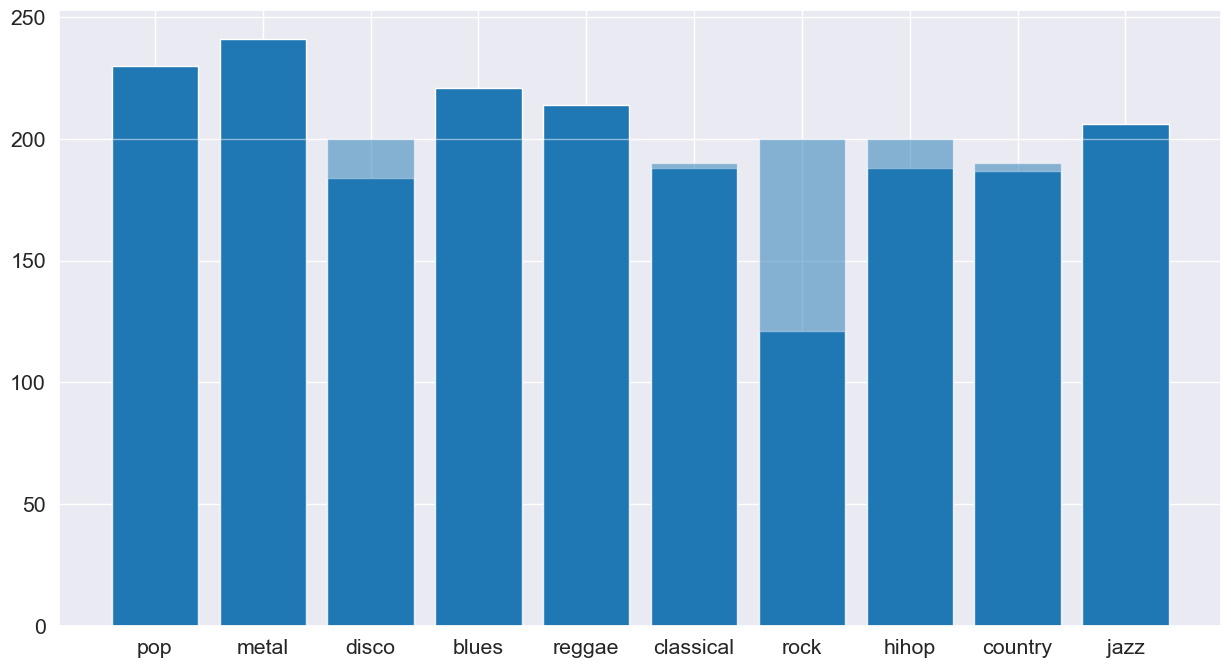

In [10]:
evaluations.distribution(y_val_pred, y_val)
